In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = 0.5 * np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [47]:
import pickle

In [175]:
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

In [177]:
len(aa)

1000

In [179]:
aa[0].shape

(368, 3)

In [170]:
def compute_and_plot(pre):
    aa = np.load(pre + f"velocity")
    aa = [np.array(aa[i]) for i in range(len(aa))]

    ss = []
    dd = list(range(0, 1000))
    n = len(aa)
    for d in dd:
        s = 0
        for i in range(n-d):
            s += np.sum(aa[i][0] * aa[i+d][0])
        ss.append(s)
    plt.plot(dd, ss)
    D = (1/3)*np.sum(ss)*(1e3)
    print("D: ", D)
    return ss

In [199]:
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

In [200]:
aa[0]

array([[ 0.06108988,  0.64130211,  0.43823639],
       [ 0.08502201,  0.04867269,  0.07001408],
       [ 0.22997189,  0.42630103, -0.37635112],
       ...,
       [-0.09597402, -0.37558568,  0.11679445],
       [-0.59465587, -0.57128912,  0.26948988],
       [ 0.43323478,  0.11916633, -0.08224347]])

In [218]:
def compute_and_plot_all_atoms(pre):
    aa = np.load(pre + f"velocity")
    aa = [np.array(aa[i]) for i in range(len(aa))]

    ss = []
    dd = list(range(0, 400))
    n = len(aa)
    for d in dd:
        s = 0
        for i in range(n-d):
            s += np.sum(aa[i] * aa[i+d])/len(aa[i])
        ss.append(s/(n-d))
        # ss.append(s)
    plt.plot(dd, ss)
    D = (1/3)*np.sum(ss)*(1e3)
    print("D: ", D)
    return ss

D:  110761.1132988413


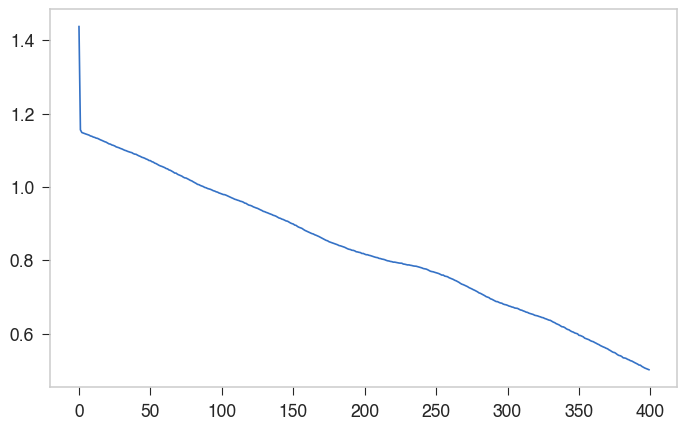

In [219]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1000/0/"
ss = compute_and_plot_all_atoms(pre)

D:  1183.5325976803604


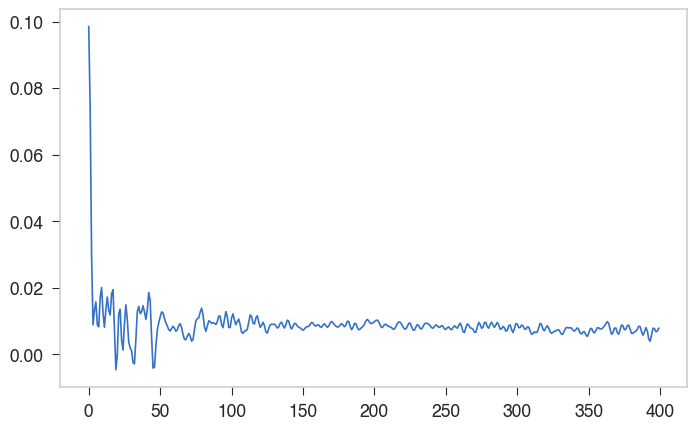

In [197]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step10/1/"
ss = compute_and_plot_all_atoms(pre)

D:  804.9514219746394


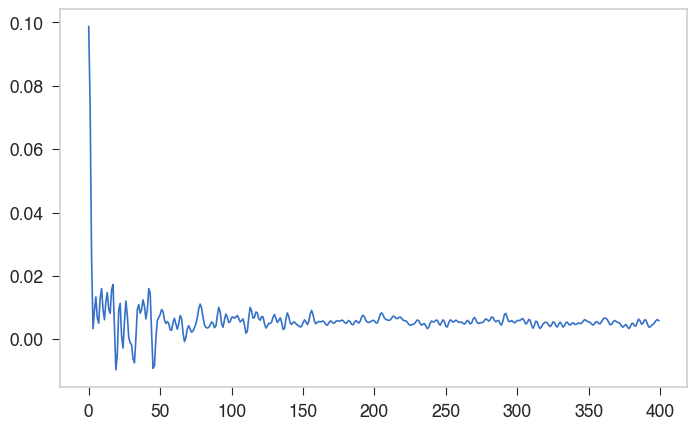

In [195]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step10/0/"
ss = compute_and_plot_all_atoms(pre)

D:  502.2829772384054


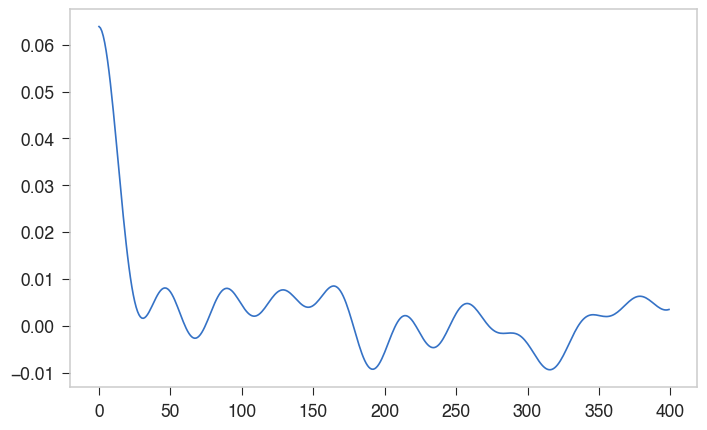

In [194]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/2/"
ss = compute_and_plot_all_atoms(pre)

D:  446.45462743999474


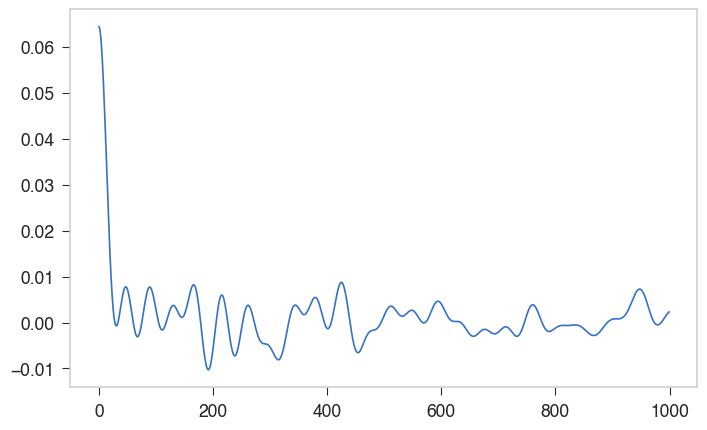

In [188]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/1/"
ss = compute_and_plot_all_atoms(pre)

D:  1043.981796164354


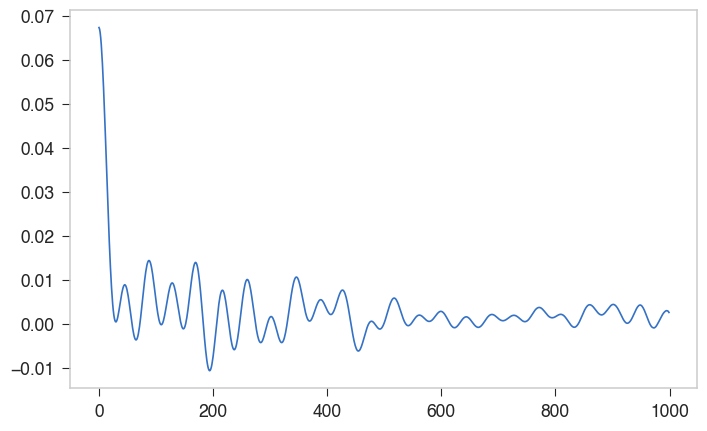

In [187]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/0/"
ss = compute_and_plot_all_atoms(pre)

D:  605066.4195187298


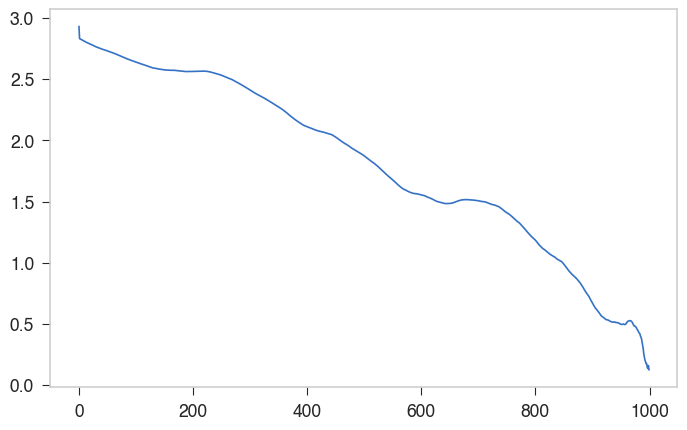

In [181]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1_friction1000/1/"
ss = compute_and_plot_all_atoms(pre)

In [183]:
np.sum(ss)

1815.1992585561893

D:  206539.63206575796


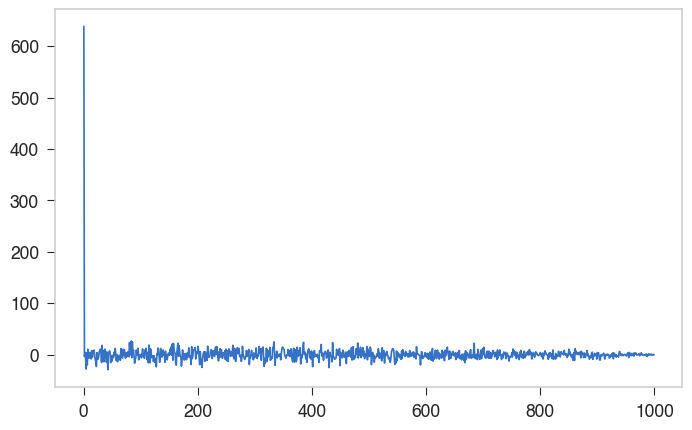

In [171]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1_friction1000/1/"
ss = compute_and_plot(pre)

D:  773560.604103925


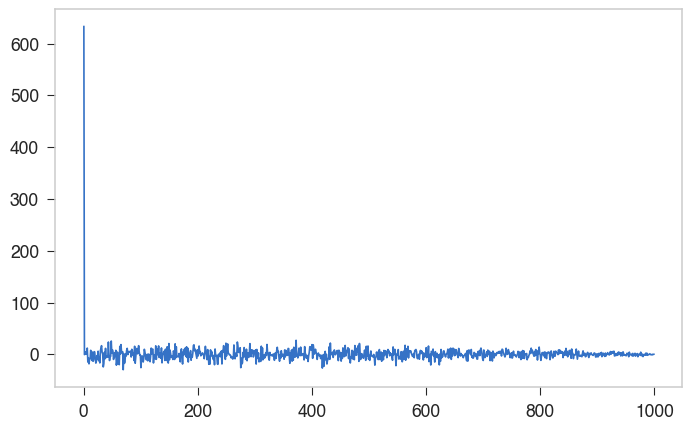

In [159]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1_friction1000/0/"
ss = compute_and_plot(pre)

In [164]:
np.sum(ss[1:])

-168.74721898022264

In [165]:
np.sum(ss)

464.13636246235507

D:  2448802.7914479743


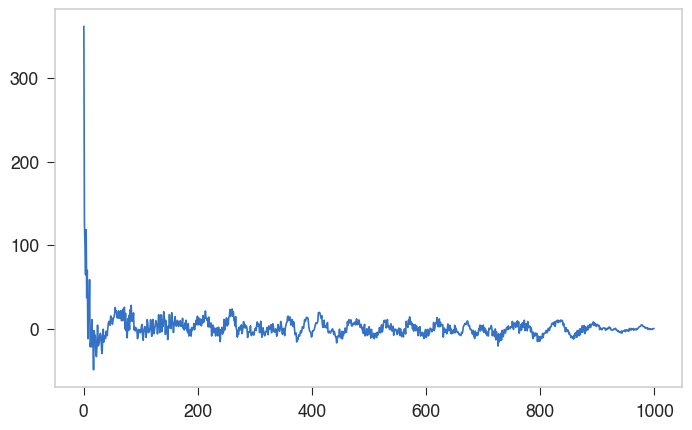

In [156]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1_friction1in1000/0/"
compute_and_plot(pre)

D:  846101.1014878325


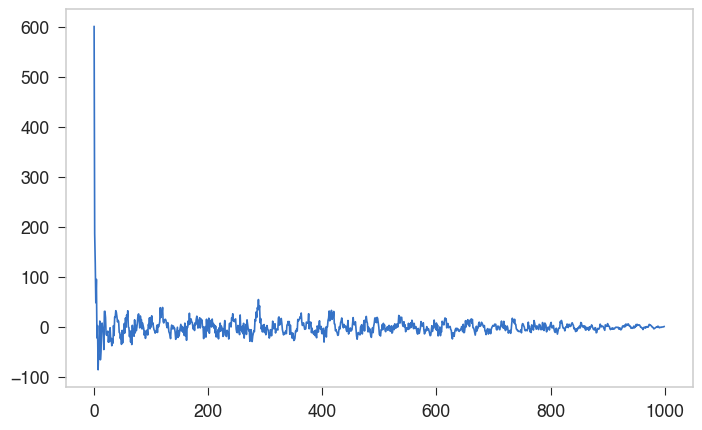

In [154]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/4/"
compute_and_plot(pre)

D:  844156.9306280286


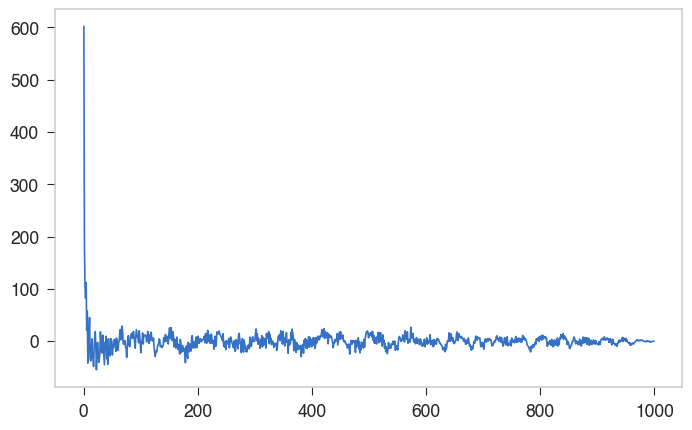

In [151]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/3/"
compute_and_plot(pre)

In [ ]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/3/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

ss = []
dd = list(range(0, 1000))
n = len(aa)
for d in dd:
    s = 0
    for i in range(n-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)
D = (1/3)*np.sum(ss)*5*(1e3)
D

844156.9306280286

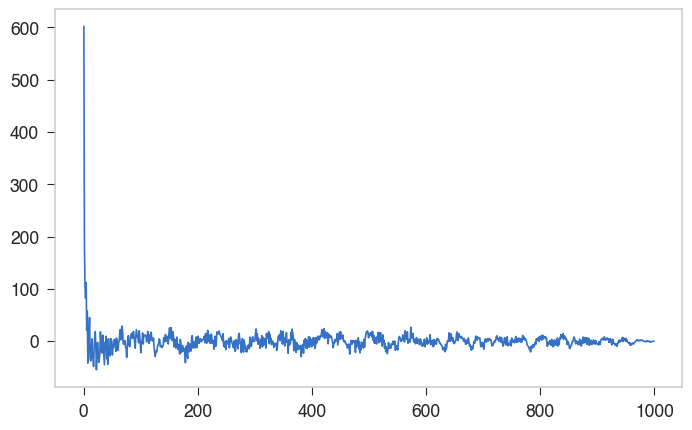

In [143]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/3/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

ss = []
dd = list(range(0, 1000))
n = len(aa)
for d in dd:
    s = 0
    for i in range(n-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)
D = (1/3)*np.sum(ss)*5*(1e3)
D

1396201.147542065

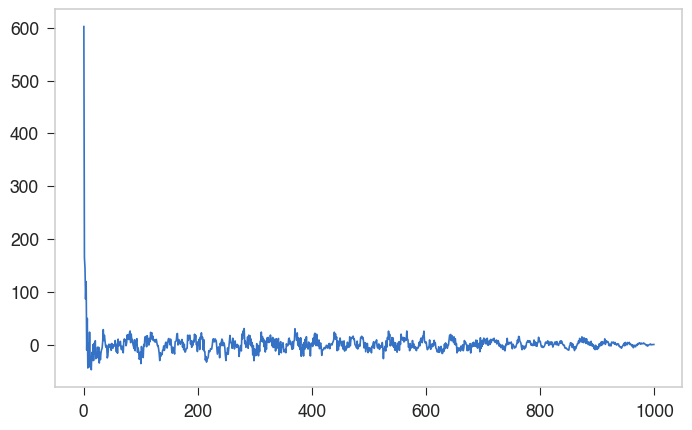

In [149]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/2/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

ss = []
dd = list(range(0, 1000))
n = len(aa)
for d in dd:
    s = 0
    for i in range(n-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)
D = (1/3)*np.sum(ss)*5*(1e3)
D

8037814.144321008

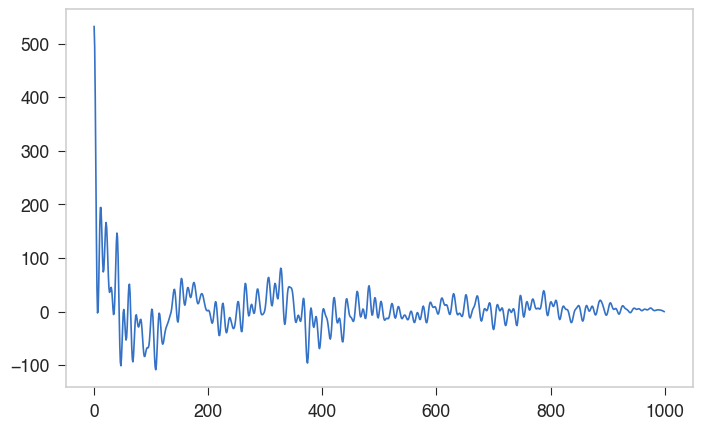

In [145]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/1/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

ss = []
dd = list(range(0, 1000))
n = len(aa)
for d in dd:
    s = 0
    for i in range(n-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)
D = (1/3)*np.sum(ss)*5*(1e3)
D

1157373.0500096765

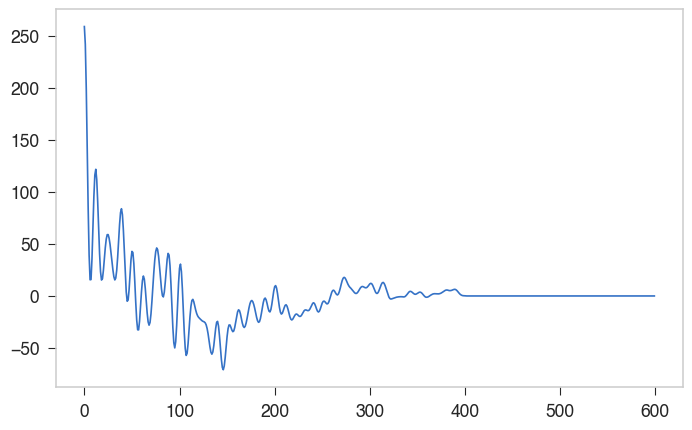

In [136]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1/0/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

ss = []
dd = list(range(0, 600))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)
D = (1/3)*np.sum(ss)*5*(1e3)
D

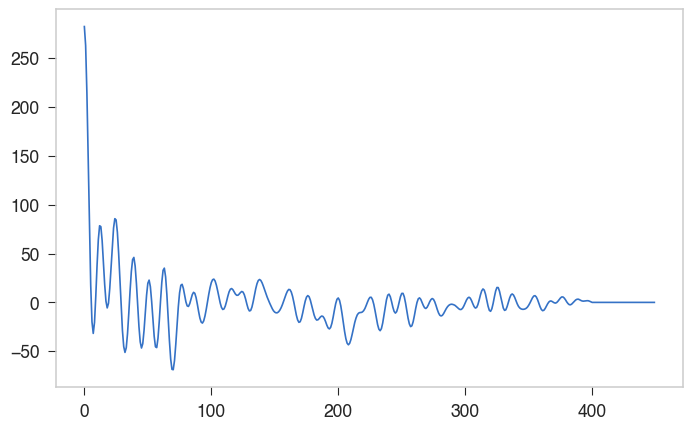

In [130]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/300_step1_2/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

ss = []
dd = list(range(0, 450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)

In [131]:
D = (1/3)*np.sum(ss)*5*(1e3)
D

701364.5785813623

In [134]:
len(aa)

1000

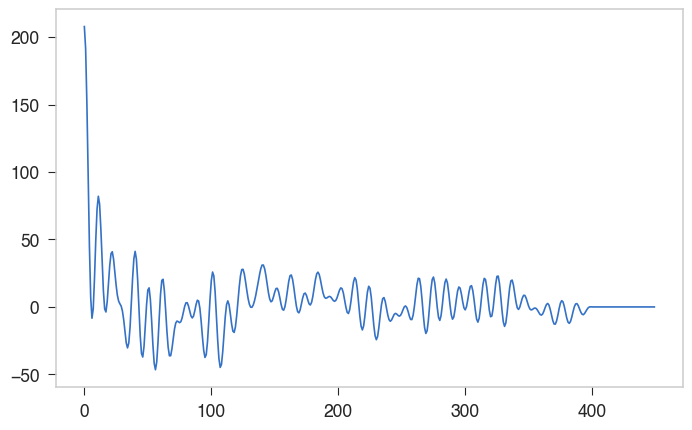

In [132]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/300_step1/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]
ss = []
dd = list(range(0, 450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)

In [133]:
D = (1/3)*np.sum(ss)*5*(1e3)
D

2619433.3675150718

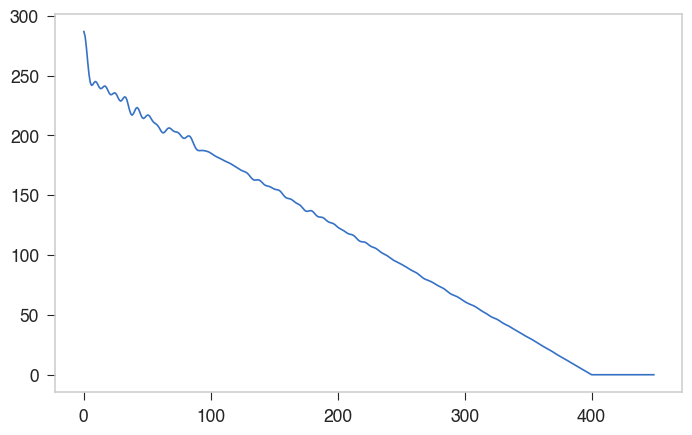

In [126]:
ss = []
dd = list(range(0, 450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.mean(aa[i] * aa[i+d])
    ss.append(s)
plt.plot(dd, ss)

In [128]:
D = (1/3)*np.sum(ss)*5*(1e3)
D

82715548.80335636

In [114]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/300_step1/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

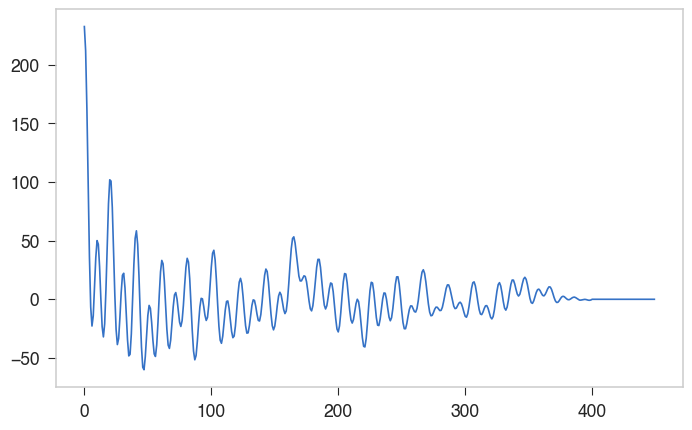

In [122]:
ss = []
dd = list(range(0, 450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)

In [123]:
D = (1/3)*np.sum(ss)*5*(1e6)
D

594166506.6513354

In [119]:
D = (1/3)*np.sum(ss)*5*(1e6)

In [121]:
D

356394261.87986386

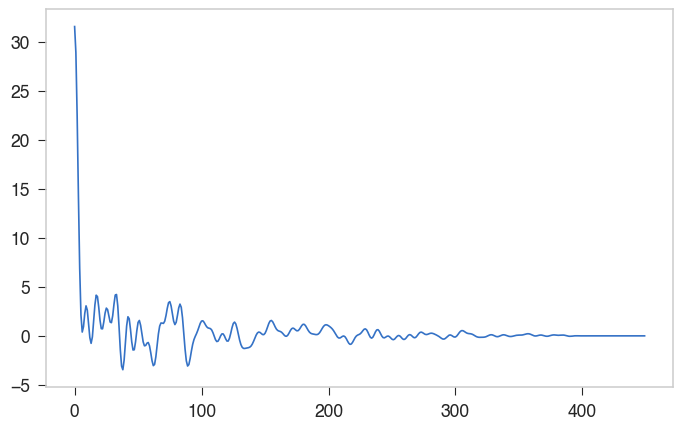

In [117]:
ss = []
dd = list(range(0, 450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.mean(aa[i] * aa[i+d])
    ss.append(s)
plt.plot(dd, ss)

In [108]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/300_setp100/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

In [109]:
len(aa)

1000

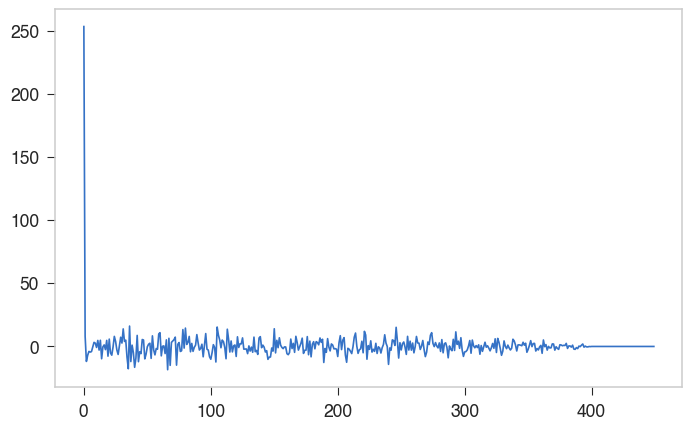

In [110]:
ss = []
dd = list(range(0, 450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)

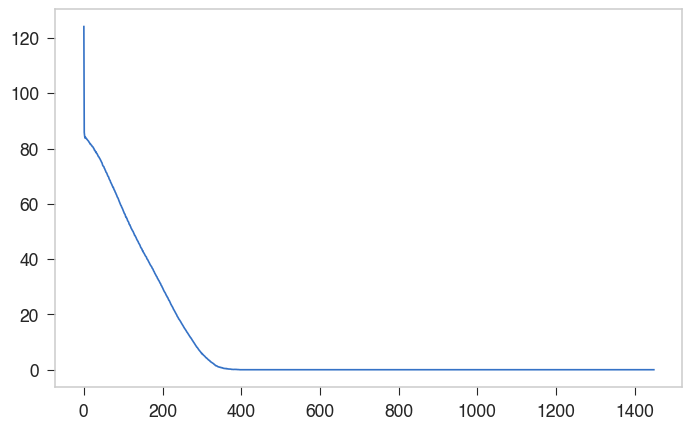

In [112]:
ss = []
dd = list(range(0, 1450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.mean(aa[i] * aa[i+d])
    ss.append(s)
plt.plot(dd, ss)

In [88]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/300_3/"
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

In [89]:
len(aa)

10000

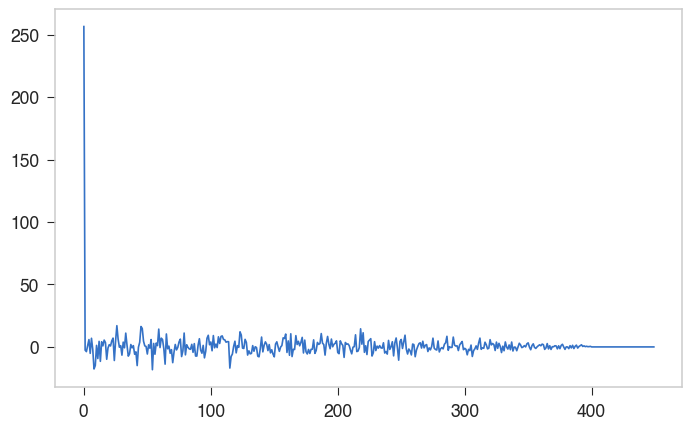

In [102]:
ss = []
dd = list(range(0, 450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.sum(aa[i][0] * aa[i+d][0])
    ss.append(s)
plt.plot(dd, ss)

In [96]:
aa[i][0] * aa[i+d][0]

array([ 0.19153534, -0.74087148, -0.00490342])

In [97]:
np.mean(aa[i][0] * aa[i+d][0])

-0.18474651834299036

In [99]:
np.sum([ 0.19153534, -0.74087148, -0.00490342])

-0.5542395600000001

In [103]:
ss = []
dd = list(range(0, 1450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.mean(aa[i] * aa[i+d])
    ss.append(s)


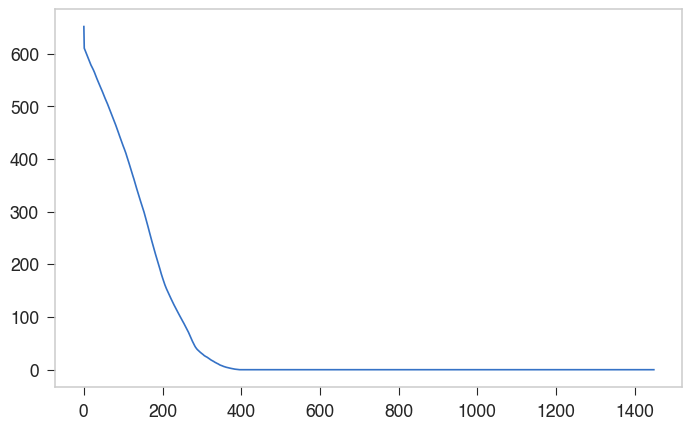

In [104]:
plt.plot(dd, ss)

In [82]:
aa = np.load(pre + f"velocity")

In [83]:
aa[0]

Quantity(value=array([[-0.27411127,  0.42487073, -0.00230884],
       [-0.00867508, -0.0020263 , -0.02483398],
       [-0.13873486,  0.00836373,  0.00481318],
       ...,
       [ 0.56605864,  0.03604668,  0.33763027],
       [-0.1275472 , -0.32107872, -0.16527788],
       [ 0.63196313,  0.72915143,  0.0444801 ]]), unit=nanometer/picosecond)

In [54]:
aa = [np.array(aa[i]) for i in range(len(aa))]

In [56]:
t = len(aa)
n = len(aa[0])

In [61]:
i = 0
j = 0
d = 5
aa[i][j]*aa[i+d][j]

array([-3.99901090e-02,  3.37084696e-03, -2.29877858e-05])

array([[ 8.20721418e-02, -1.50966881e-01,  1.40548818e-03],
       [ 1.28150769e-04,  5.09166615e-06,  6.72284697e-04],
       [-2.28687381e-02,  3.49790539e-03,  5.19606650e-04],
       ...,
       [ 1.01608174e-01,  7.55959965e-03,  2.31235724e-01],
       [-1.11015632e-02,  8.43110529e-02,  1.02971022e-03],
       [-8.23376679e-02,  3.16584786e-01, -2.76348761e-03]])

In [80]:
ss = []
dd = list(range(1, 450))
for d in dd:
    s = 0
    for i in range(t-d):
        s += np.mean(aa[i] * aa[i+d])
    ss.append(s)


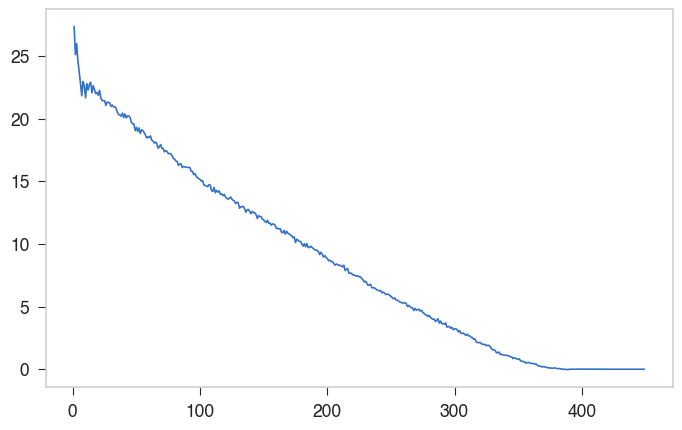

In [81]:
plt.plot(dd, ss)

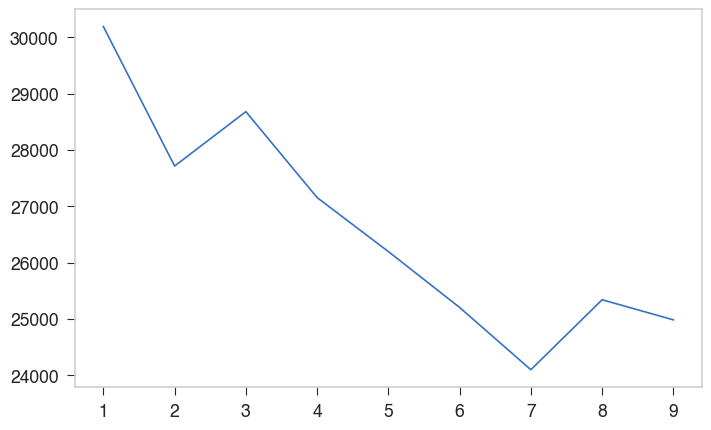

In [65]:
plt.plot(dd, ss)

In [201]:
movieFile = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/300/movie.pdb"

In [202]:
parser = PDBParser()
s = parser.get_structure("X", movieFile)

In [203]:
# I want to have all the coordinates of all CA.
info = []
for i, model in enumerate(s.get_models()):
    for j, res in enumerate(model.get_residues()):
        ca_coord = res["CA"].get_coord()
        info.append([i, j] + list(ca_coord))

In [204]:
data = pd.DataFrame(info, columns=["model", "res", "x", "y", "z"])

In [213]:
a = data.iloc[:, 2:5].values

In [220]:
rsqure = np.sum(a**2)/len(a)

In [221]:
rsqure

633.1471595332097

In [222]:
for model, d in data.groupby("model"):
    a = d.iloc[:, 2:5].values
    rsqure = np.sum(a**2)/len(a)
    print(rsqure, model)

634.3550614315755 0
636.0127210223991 1
629.0899999008516 2
631.5779121426749 3
632.922798325731 4
635.2741800161668 5
634.1971441560834 6
630.8864986113338 7
635.1361545354933 8
632.0191251897879 9


In [229]:
movieFile = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1000/0/movie.pdb"
parser = PDBParser()
s = parser.get_structure("X", movieFile)
# I want to have all the coordinates of all CA.
info = []
for i, model in enumerate(s.get_models()):
    for j, res in enumerate(model.get_residues()):
        ca_coord = res["CA"].get_coord()
        info.append([i, j] + list(ca_coord))
data = pd.DataFrame(info, columns=["model", "res", "x", "y", "z"])
rsquare_list = []
model_list = []
for model, d in data.groupby("model"):
    if model == 0:
        a_0 = d.iloc[:, 2:5].values
    a = d.iloc[:, 2:5].values - a_0
    rsquare = np.sum(a**2)/len(a)
    print(rsquare, model)
#     info.append([model, rsquare])
    model_list.append(model)
    rsquare_list.append(rsquare)

0.0 0
6.323870932500511 1
6.5585446814734025 2
7.3171575177822055 3
8.415885016047445 4
3.06710077982019 5
4.322005143274843 6
3.4399954439136344 7
10.419829276018275 8
20.954787089930043 9
35.46052175543065 10
51.623805745566784 11
46.0888873345128 12
59.62151556210298 13
45.118493856746824 14
58.658722853007234 15
32.60012370435268 16
33.199382941243144 17
45.274995942789076 18
48.77132140080258 19
57.52104616898976 20
76.04400721195455 21
84.44833842430047 22
111.80481713344955 23
128.50161612352701 24
109.23621765075899 25
98.25656013133386 26
40.818509291935854 27
55.09474212374172 28
39.36966724749324 29
31.443456964434652 30
53.67164188561795 31
93.62766366478543 32
93.71385131335882 33
101.86013986204405 34
78.40086208307086 35
106.32418274786332 36
113.00148612337873 37
103.36036220354508 38
112.58918193289307 39
143.96144840053407 40
139.96299566470833 41
120.97381922320449 42
102.17963645422984 43
111.70633582252718 44
80.0841737394227 45
87.04549179616043 46
122.33503490431

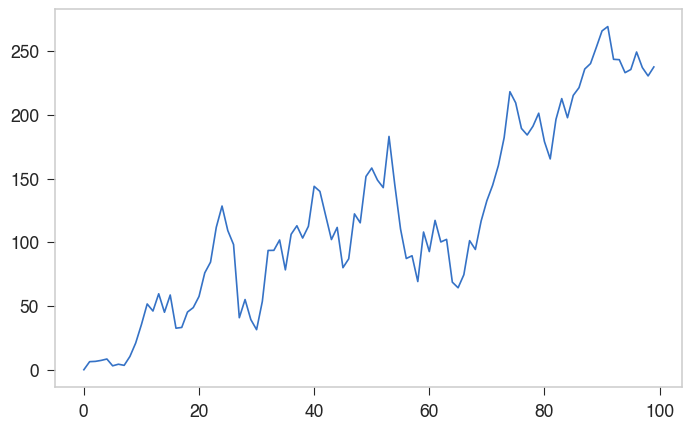

In [230]:
plt.plot(model_list, rsquare_list)

In [ ]:
with open(movieFile, "r") as f:
    a = f.readlines()
a = a[1:-1]
n = len(a)
length = int(n/10)

i = 0
b = a[i*length:(i+1)*length]